# 01_EDA_Cleaning
##### Authors: Diego Senso González, Luis Vaciero
##### 15 january 2021
##### Module: Machine Learning - Master's Degree in Data Science for Finance

## Objective
The purpose of this document is to carry out an EDA on the data available on bicycle routes from the company Bicimad during 2020.

## Explanation of the dataset and dictionary of variables

The dataset has the following variables:

- _id: Movement identifier.
- user_day_code: User code. For the same date, all the movements of the same user, will have the same code, in order to be able to carry out studies statistics of daily user trends.
- idplug_base: Number of the base where the bicycle is hooked.
- user_type: Number that indicates the type of user that has made the movement. possible values are: 0: User type could not be determined, 1: Annual user (annual pass holder), 2: Occasional user, 3: Company worker.
- idunplug_base: Number of the base from which the bicycle is unplugged.
- travel_time: Total time in seconds, between the release and the hooking of the bicycle.
- idunplug_station: Number of the station from which the bike is unplugged.
- ageRange: Number indicating the age range of the user who has performed the movement. Its possible values are: 0: The age range of the user could not be determined, 1: The user is between 0 and 16 years old, 2: The user is between 17 and 18 years old, 3: The user is between 19 and 26 years old, 4: The user is between 27 and 40 years old, 5: The user is between 41 and 65 years old, 6: The user is 66 years or older.
- idplug_station: Number of the station where the bicycle is hooked.
- unplug_hourTime: Time zone where the bicycle is unplugged. For anonymity reasons, the time of the beginning of the movement is given, without the information in minutes and seconds. All movements initiated during the same time, they will have the same starting data.
- zip_code: Text indicating the zip code of the user who made the move.

## Libraries
Firstly, we import the requested libraries for the EDA.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the data

We load all data, which corresponds to all travel records during the year 2020.

In [2]:
bicimad1 = pd.read_csv('../data/202001_movements.csv', delimiter = ';')
bicimad2 = pd.read_csv('../data/202002_movements.csv', delimiter = ';')
bicimad3 = pd.read_csv('../data/202003_movements.csv', delimiter = ';')
bicimad4 = pd.read_csv('../data/202004_movements.csv', delimiter = ';')
bicimad5 = pd.read_csv('../data/202005_movements.csv', delimiter = ';')
bicimad6 = pd.read_csv('../data/202006_movements.csv', delimiter = ';')
bicimad7 = pd.read_csv('../data/202007_movements.csv', delimiter = ';')
bicimad8 = pd.read_csv('../data/202008_movements.csv', delimiter = ';')
bicimad9 = pd.read_csv('../data/202009_movements.csv', delimiter = ';')
bicimad10 = pd.read_csv('../data/202010_movements.csv', delimiter = ';')
bicimad11 = pd.read_csv('../data/202011_movements.csv', delimiter = ';')
bicimad12 = pd.read_csv('../data/202012_movements.csv', delimiter = ';')
stations = pd.read_csv('../data/xn--Bici+Transporte_pblico-xkc.csv', delimiter = ',')

C:\Users\diego\anaconda3\envs\eda_env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


We observe the first rows of both datasets.

In [3]:
bicimad1.head(5)

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code
0,5eeb03e42ea8f656fc95f2a4,c87385356e6eb4b9854a2e64f719017d1023e3de201abb...,1,1,21,210,87,2,78,2020-01-01T00:00:00Z,28007
1,5eeb03e42ea8f656fc95f2a7,35190181c1ada5deae3e8d51d05aee4090267969a20975...,1,1,21,401,58,4,168,2020-01-01T00:00:00Z,28004
2,5eeb03e42ea8f656fc95f2aa,f77e4af707dfc3753aea3a3964923f256ef9c0be141399...,19,1,23,473,129,4,82,2020-01-01T00:00:00Z,28045
3,5eeb03e42ea8f656fc95f2ad,b7ff183e57cd412f698349540a4c729d0e4e396f4fc586...,1,1,19,285,208,4,8,2020-01-01T00:00:00Z,28004
4,5eeb03e42ea8f656fc95f2b1,f272ac2e59e493866254c364c86253edd7fae80ff4706f...,12,1,8,436,9,4,166,2020-01-01T00:00:00Z,28020


In [4]:
stations.head(3)

,X,Y,FID,Estación,Gis_X,Gis_Y,Distrito,Barrio,Calle,Nº,Anclajes,Capacidad,TipoAnclaje,CPROV,CMUN,CPOSTAL
0,-3.701305,40.418893,1,001a,440503.99,4474488.02,01 CENTRO,01-06 SOL,"PUERTA DEL SOL, PLAZA, DE LA",1 B,24,NaN,NaN,28,79,28013
1,-3.701192,40.418955,2,001b,440513.65,4474494.88,01 CENTRO,01-06 SOL,"ALCALA, CALLE, DE",1,24,NaN,NaN,28,79,28013
2,-3.704403,40.422457,3,2,440244.27,4474885.71,01 CENTRO,01-05 UNIVERSIDAD,"MIGUEL MOYA, CALLE, DE",1,27,NaN,NaN,28,79,28004


We are interested in knowing in which months there were more or less trips, so with the len function we observe it.

In [5]:
jan = len(bicimad1)
feb = len(bicimad2)
mar = len(bicimad3)
apr = len(bicimad4)
may = len(bicimad5)
jun = len(bicimad6)
jul = len(bicimad7)
aug = len(bicimad8)
sep = len(bicimad9)
octo = len(bicimad10)
nov = len(bicimad11)
dic = len(bicimad12)

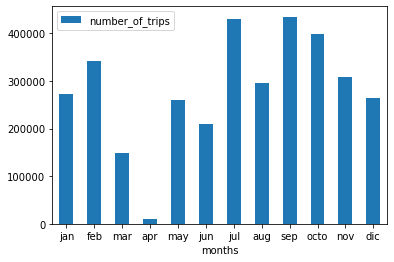

In [6]:
df = pd.DataFrame({'months':['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'octo', 'nov', 'dic'], 'number_of_trips':[jan, feb, mar, apr, may, jun, jul, aug, sep, octo, nov, dic]})
ax = df.plot.bar(x='months', y='number_of_trips', rot=0 )

As we can see, the months that clearly had the greatest number of trips were September, July and October in this order. In contrast, the month that clearly had the least number of trips was April, followed by March. Here, the effects of the confinement caused by the Covid-19 pandemic can be clearly seen.

## Data Cleaning and Data Processing

We proceed to concatenate the datasets, in order to carry out the EDA on the total of the 2020 data.

In [7]:
bicimad = pd.concat([bicimad1, bicimad2, bicimad3, bicimad4, bicimad5, bicimad6, bicimad7, bicimad8, bicimad9, bicimad10, bicimad11, bicimad12])

Then, with the merge function we join the dataset with the paths with a dataset that includes the names of the stations.

In [8]:
bicimad = pd.merge(bicimad, stations, left_on= 'idunplug_station', right_on = 'FID')
bicimad = pd.merge(bicimad, stations, left_on= 'idplug_station', right_on = 'FID')

We select the variables that interest us for further study. Thus, we eliminate unnecessary variables and those that are repeated after applying the merge function.

In [9]:
bicimad = bicimad.loc[:,['user_type', 'travel_time', 'idunplug_station', 'ageRange', 'idplug_station', 'unplug_hourTime', 'Distrito_x', 'Barrio_x', 'Calle_x', 'Distrito_y', 'Barrio_y', 'Calle_y']]

At this moment, we have the date and time of each trip in the same column. We proceed to separate both data and place them in two different columns, called 'date' and 'hour_time'.

In [10]:
date_and_time = bicimad['unplug_hourTime'].str.split('T', expand = True)

In [11]:
bicimad['date'] = date_and_time[0]
bicimad['hour_time'] = date_and_time[1]

We remove a remaining character from the column containing the time. After this step, we will have both values separated and clean.

In [12]:
bicimad['hour_time'] = bicimad['hour_time'].str.split('Z', expand = True)

We remove the initial column.

In [13]:
bicimad.drop(['unplug_hourTime'], axis = 'columns', inplace = True)

We renamed some of the columns created, in order to clarify their content.

In [14]:
bicimad.rename(columns = {'Calle_x':'origin', 'Calle_y':'destination', 
                          'Barrio_x':'neighbourhood_origin', 'Barrio_y':'neighbourhood_dest',
                          'Distrito_x':'district_origin', 'Distrito_y':'district_dest'}, inplace = True)

## EDA 
### First exploration
As a first step, we choose to see the shape and size of the dataset to get a clear idea about the dimensions of the data which we are going to study.

In [15]:
bicimad.shape

(2056524, 13)

In [16]:
bicimad.size

26734812

In addition, we observe the first and last rows.

In [17]:
bicimad.head()

,user_type,travel_time,idunplug_station,ageRange,idplug_station,district_origin,neighbourhood_origin,origin,district_dest,neighbourhood_dest,destination,date,hour_time
0,1,210,87,2,78,03 RETIRO,03-02 ADELFAS,"DOCTOR ESQUERDO, CALLE, DEL",03 RETIRO,03-06 NIÑO JESÚS,"JUAN DE URBIETA, CALLE, DE",2020-01-01,00:00:00
1,1,330,87,0,78,03 RETIRO,03-02 ADELFAS,"DOCTOR ESQUERDO, CALLE, DEL",03 RETIRO,03-06 NIÑO JESÚS,"JUAN DE URBIETA, CALLE, DE",2020-01-02,09:00:00
2,1,281,87,4,78,03 RETIRO,03-02 ADELFAS,"DOCTOR ESQUERDO, CALLE, DEL",03 RETIRO,03-06 NIÑO JESÚS,"JUAN DE URBIETA, CALLE, DE",2020-01-03,09:00:00
3,1,270,87,0,78,03 RETIRO,03-02 ADELFAS,"DOCTOR ESQUERDO, CALLE, DEL",03 RETIRO,03-06 NIÑO JESÚS,"JUAN DE URBIETA, CALLE, DE",2020-01-03,13:00:00
4,1,245,87,0,78,03 RETIRO,03-02 ADELFAS,"DOCTOR ESQUERDO, CALLE, DEL",03 RETIRO,03-06 NIÑO JESÚS,"JUAN DE URBIETA, CALLE, DE",2020-01-04,08:00:00


In [18]:
 bicimad.tail()

,user_type,travel_time,idunplug_station,ageRange,idplug_station,district_origin,neighbourhood_origin,origin,district_dest,neighbourhood_dest,destination,date,hour_time
2056519,1,1464,32,0,109,01 CENTRO,01-03 CORTES,"ALCALA, CALLE, DE",04 SALAMANCA,04-01 RECOLETOS,"SERRANO, CALLE, DE",2020-10-03,20:00:00
2056520,1,377,32,3,109,01 CENTRO,01-03 CORTES,"ALCALA, CALLE, DE",04 SALAMANCA,04-01 RECOLETOS,"SERRANO, CALLE, DE",2020-10-15,22:00:00
2056521,1,489,32,0,109,01 CENTRO,01-03 CORTES,"ALCALA, CALLE, DE",04 SALAMANCA,04-01 RECOLETOS,"SERRANO, CALLE, DE",2020-10-19,06:00:00
2056522,1,396,32,0,109,01 CENTRO,01-03 CORTES,"ALCALA, CALLE, DE",04 SALAMANCA,04-01 RECOLETOS,"SERRANO, CALLE, DE",2020-10-19,07:00:00
2056523,1,359,32,0,109,01 CENTRO,01-03 CORTES,"ALCALA, CALLE, DE",04 SALAMANCA,04-01 RECOLETOS,"SERRANO, CALLE, DE",2020-10-23,07:00:00


Thanks to "info" function we can get valuable info. We can see the total number of observations,variables, and which is the format of the columns we are going to find afterwards.

In [19]:
bicimad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056524 entries, 0 to 2056523
Data columns (total 13 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   user_type             int64 
 1   travel_time           int64 
 2   idunplug_station      int64 
 3   ageRange              int64 
 4   idplug_station        int64 
 5   district_origin       object
 6   neighbourhood_origin  object
 7   origin                object
 8   district_dest         object
 9   neighbourhood_dest    object
 10  destination           object
 11  date                  object
 12  hour_time             object
dtypes: int64(5), object(8)
memory usage: 219.7+ MB


### Elimination of null values and NA
We are going to study the percentage of null of the resulting dataset. But first, we eliminate possible duplicates.

In [20]:
bicimad = bicimad.drop_duplicates()

In [21]:
percentage_NaN = bicimad.apply(lambda x:sum(x.isna()/len(bicimad)))
percentage_NaN.sort_values(ascending = False).head(60)

hour_time               0.0
date                    0.0
destination             0.0
neighbourhood_dest      0.0
district_dest           0.0
origin                  0.0
neighbourhood_origin    0.0
district_origin         0.0
idplug_station          0.0
ageRange                0.0
idunplug_station        0.0
travel_time             0.0
user_type               0.0
dtype: float64

In [22]:
bicimad.isna().sum()

user_type               0
travel_time             0
idunplug_station        0
ageRange                0
idplug_station          0
district_origin         0
neighbourhood_origin    0
origin                  0
district_dest           0
neighbourhood_dest      0
destination             0
date                    0
hour_time               0
dtype: int64

The dataset contains no NA or null values, so no further processing is necessary.

### Representation of categorical variables
In order to carry out a better study, first of all some of the categorical variables are going to be represented graphically, in order to obtain an idea of how they are distributed and behave.

We will study the frequency of passage through each station. We will see from which stations the highest number of bike trips arrive and depart.

In [23]:
bicimad['origin'].value_counts().head(10)

CASTELLANA, PASEO, DE LA               61024
MENENDEZ PELAYO, AVENIDA, DE           59782
SERRANO, CALLE, DE                     42400
SANTA ENGRACIA, CALLE, DE              41470
ALCALA, CALLE, DE                      38285
SAN BERNARDO, CALLE, DE                36505
CIUDAD DE BARCELONA, AVENIDA, DE LA    35843
SANTA ISABEL, CALLE, DE                34698
GOYA, CALLE, DE                        33790
AYALA, CALLE, DE                       33591
Name: origin, dtype: int64

In [24]:
bicimad['destination'].value_counts().head(10)

CASTELLANA, PASEO, DE LA               61492
MENENDEZ PELAYO, AVENIDA, DE           58939
SANTA ENGRACIA, CALLE, DE              42164
SERRANO, CALLE, DE                     41838
ALCALA, CALLE, DE                      38072
SAN BERNARDO, CALLE, DE                36679
CIUDAD DE BARCELONA, AVENIDA, DE LA    35241
SANTA ISABEL, CALLE, DE                35153
ALFONSO XII, CALLE, DE                 34316
GOYA, CALLE, DE                        34271
Name: destination, dtype: int64

Now we see the same data according to the district of Madrid.

In [25]:
bicimad['district_origin'].value_counts()

01  CENTRO             753080
04  SALAMANCA          272238
07  CHAMBERÍ           260604
03  RETIRO             257710
02  ARGANZUELA         169086
05  CHAMARTÍN          144657
06  TETUÁN              92165
09  MONCLOA-ARAVACA     90169
Name: district_origin, dtype: int64

In [26]:
bicimad['district_dest'].value_counts()

01  CENTRO             753435
04  SALAMANCA          272405
07  CHAMBERÍ           259781
03  RETIRO             259238
02  ARGANZUELA         169162
05  CHAMARTÍN          143161
06  TETUÁN              92352
09  MONCLOA-ARAVACA     90175
Name: district_dest, dtype: int64

Finally, the number of journeys serving the capital's neighborhood.

In [27]:
bicimad['neighbourhood_origin'].value_counts().head(10)

01-02 EMBAJADORES       190987
01-04 JUSTICIA          140730
01-05 UNIVERSIDAD       139830
01-01 PALACIO           135561
04-01 RECOLETOS         126657
07-05 RÍOS ROSAS         85596
01-03 CORTES             83716
05-01 EL VISO            82040
03-05 JERÓNIMOS          73781
06-02 CUATRO CAMINOS     72133
Name: neighbourhood_origin, dtype: int64

In [28]:
bicimad['neighbourhood_dest'].value_counts().head(10)

01-02 EMBAJADORES       189508
01-05 UNIVERSIDAD       141192
01-04 JUSTICIA          141189
01-01 PALACIO           134790
04-01 RECOLETOS         126028
07-05 RÍOS ROSAS         85367
01-03 CORTES             84462
05-01 EL VISO            79595
03-05 JERÓNIMOS          74729
06-02 CUATRO CAMINOS     71955
Name: neighbourhood_dest, dtype: int64

In all cases and despite small deviations, the most popular locations are usually for both arrival and departure of bicycles. Next, we look at the days when the most and least trips have been made.

Now, we look at the percentage of trips that begin and end in the same place. This will help us to analyze if Bicimad users usually take the bike for short trips and returning to the same place, or if on the contrary they usually make longer journeys by changing areas.

In [39]:
(sum(bicimad['origin'] == bicimad['destination'])/len(bicimad))*100

6.307125183053072

In the case of the streets, only 6% of the users start and finish the trip on the street. We associate this with the fact that many may take it for trips such as going to work or to a leisure meeting, instead of short journeys that start and end in the same place.

In [40]:
(sum(bicimad['neighbourhood_origin'] == bicimad['neighbourhood_dest'])/len(bicimad))*100

10.707262653643241

In [41]:
(sum(bicimad['district_origin'] == bicimad['district_dest'])/len(bicimad))*100

28.76885869503934

In the case of the neighborhoods, the percentage increases a little. But when it comes to districts, the figure varies more. About 30% of trips start and end in the same district, a statistic that explains that a certain percentage of users use the bicycle for long trips, but not so much as to change districts within the capital.

In [29]:
bicimad['date'].value_counts().head(10)

2020-09-10    10391
2020-09-16    10333
2020-09-09    10329
2020-07-02    10307
2020-09-11    10165
2020-07-01    10141
2020-09-15    10069
2020-10-08     9939
2020-10-09     9841
2020-07-08     9831
Name: date, dtype: int64

In [30]:
bicimad['date'].value_counts().tail(10)

2020-05-01    537
2020-04-23    515
2020-04-25    391
2020-04-22    363
2020-04-26    352
2020-03-16    180
2020-03-17    108
2020-04-20     52
2020-04-21     18
2020-04-19      9
Name: date, dtype: int64

As you can see, the three days with the highest number of trips belong to the month of September, which was also the month with the highest number of trips. Next, we look at the hours with the most traffic.

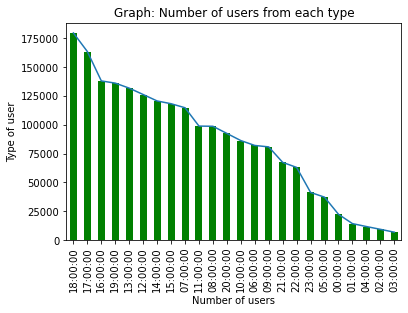

In [31]:
(bicimad['hour_time'].value_counts()).plot()
(bicimad['hour_time'].value_counts()).plot(kind = "bar", color = "green")

plt.title('Graph: Number of users from each type')
plt.xlabel('Number of users')
plt.ylabel('Type of user');

The first hours of the afternoon are when the greatest number of bicycles are used by users.

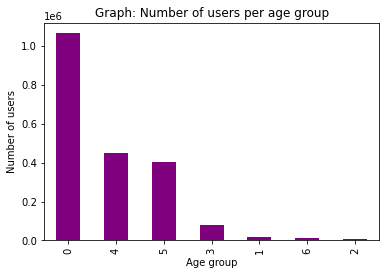

In [32]:
(bicimad['ageRange'].value_counts()).plot(kind = "bar", color = "purple")

plt.title('Graph: Number of users per age group')
plt.xlabel('Age group')
plt.ylabel('Number of users');

With regard to ages, it should be stressed that data collection does not allow us to draw any major conclusions. This is because the value 0 implies that the age range could not be properly collected. Outside this value, groups 4 and 5 are the ones that make the most use of bicycles. Respectively, these groups range from 27-40 to 41-60 years old.

### Representation of numerical variables

We observe how the variable 'travel_time' is distributed, which is the only continuous numerical variable existing in the dataset.

In [33]:
bicimad['travel_time'].describe()

count    2.039709e+06
mean     1.615969e+03
std      4.572259e+04
min     -3.946600e+04
25%      4.630000e+02
50%      6.970000e+02
75%      1.046000e+03
max      9.078479e+06
Name: travel_time, dtype: float64

Below, you can see a relationship between travel time and the age group of the users of this service.

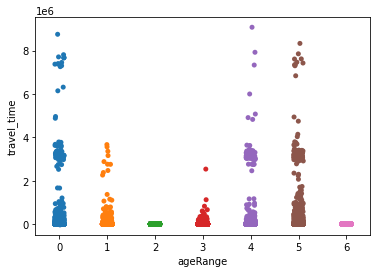

In [34]:
sns.stripplot(x="ageRange", y="travel_time", data=bicimad);

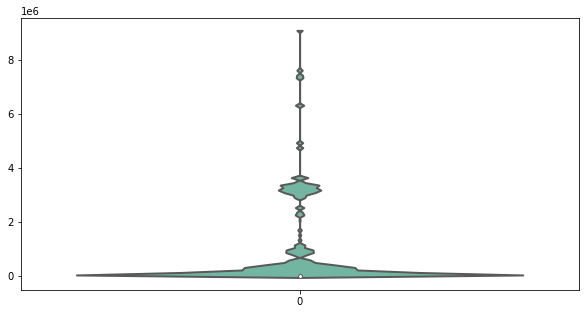

In [35]:
f, ax = plt.subplots(figsize=(10, 5))
sns.violinplot(data=bicimad['travel_time'], palette="Set2", bw=.10, cut=1, linewidth=2);

According to the violin chart, journey times are usually low, although there is a certain accumulation of journeys on somewhat longer trips.

## Dataset Exportation

After the EDA and the data cleaning, we exported the dataset to continue working with it from other aspects.

In [36]:
bicimad.to_csv(r'../data/bicimad.csv')